<a href="https://colab.research.google.com/github/mthSolon/Data_Science/blob/main/House_Rocket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise de dados da empresa House Rocket**
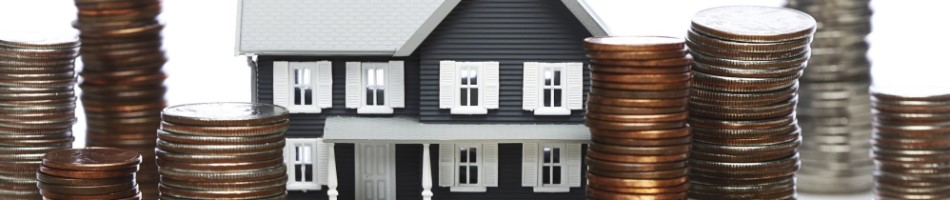

*A empresa e o contexto são fictícios e foram obtidos no site sejaumdatascientist.com*
# Estudo do negócio

A House Rocket é uma empresa de compra e venda de imóveis utilizando tecnologia.
O CEO da House Rocket quer saber maximizar a receita da empresa.

A estratégia é encontrar casas em uma boa localização que tenham preços baixos e vendê-las por um preço mais alto.

Meu trabalho como data scientist, principalmente, é responder as seguintes perguntas:

**1. Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?**

**2. Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?**

**3. A House Rocket deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?**

## Obtenção dos dados

In [149]:
# Importação das bibliotecas.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [150]:
# Lendo os dados
df = pd.read_csv('kc_house_data.csv')
df.head()

id             date     price  ...     long  sqft_living15  sqft_lot15
0  7129300520  20141013T000000  221900.0  ... -122.257           1340        5650
1  6414100192  20141209T000000  538000.0  ... -122.319           1690        7639
2  5631500400  20150225T000000  180000.0  ... -122.233           2720        8062
3  2487200875  20141209T000000  604000.0  ... -122.393           1360        5000
4  1954400510  20150218T000000  510000.0  ... -122.045           1800        7503

[5 rows x 21 columns]

## Tratamento dos dados

In [151]:
df['date'] = pd.to_datetime(df['date']) #Convertendo o atributo "date" para o formato YY/MM/DD
df

id       date     price  ...     long  sqft_living15  sqft_lot15
0      7129300520 2014-10-13  221900.0  ... -122.257           1340        5650
1      6414100192 2014-12-09  538000.0  ... -122.319           1690        7639
2      5631500400 2015-02-25  180000.0  ... -122.233           2720        8062
3      2487200875 2014-12-09  604000.0  ... -122.393           1360        5000
4      1954400510 2015-02-18  510000.0  ... -122.045           1800        7503
...           ...        ...       ...  ...      ...            ...         ...
21608   263000018 2014-05-21  360000.0  ... -122.346           1530        1509
21609  6600060120 2015-02-23  400000.0  ... -122.362           1830        7200
21610  1523300141 2014-06-23  402101.0  ... -122.299           1020        2007
21611   291310100 2015-01-16  400000.0  ... -122.069           1410        1287
21612  1523300157 2014-10-15  325000.0  ... -122.299           1020        1357

[21613 rows x 21 columns]

In [152]:
df.shape # Dimensões do dataset

(21613, 21)

In [153]:
df.isnull().sum() # Nenhum dado faltante.

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [154]:
df.duplicated().sum() # Nenhum dado duplicado.

0

### Estas são as definições de cada atributo:

**id - ID único para cada casa vendida.**

**date - Data da venda.**

**price - Preço de cada casa vendida.**

**bedrooms - Número de quartos.**

**bathrooms - Número de banheiros, onde .5 significa um banheiro com aparelho sanitário mas sem chuveiro.**

**sqft_living - Metragem quadrada do interior das casas.**

**sqft_lot - Metragem quadrada do terreno.**

**floors - Número de andares.**

**waterfront - Se o apartamento possui vista para o mar ou não.**

**view - Um índice de 0 a 4 de quão bom a vista da casa era.**

**condition - Um índice de 1 a 5 sobre a condição da casa.**

**grade - Um índice de 1 a 13, em que 1-3 o nível da construção e design era ruim, 7 o nível era mediano de construção e design, e 11-13 o nível era de alta qualidade de construção e design.**

**sqft_above - A metragem quadrada do espaço habitacional interior que está acima do nível do solo.**

**sqft_basement - A metragem quadrada do espaço interno da habitação que está abaixo do nível do solo.**

**yr_built - Ano em que a casa começou a ser construída.**

**yr_renovated - Ano da última reforma da casa.**

**zipcode - Código postal da casa (tipo o CEP brasileiro).**

**lat - Latitude**

**long - Longitude**

**sqft_living15 - A metragem quadrada do espaço interno de habitação para os 15 vizinhos mais próximos.**

**sqft_lot15 - A metragem quadrada dos lotes de terra dos 15 vizinhos mais próximos.**

Vamos agrupar os dados pela coluna de preço com o objetivo de correlacionar alguns atributos, isto é, quais atributos influenciam no aumento de preços.

In [155]:
df.groupby('price').sum()

id  bedrooms  bathrooms  ...     long  sqft_living15  sqft_lot15
price                                       ...                                    
75000.0    3421079032         1       0.00  ... -121.906           1160       42882
78000.0      40000362         2       1.00  ... -122.280           1700       10387
80000.0    8658300340         1       0.75  ... -121.909           1200        7500
81000.0    3028200080         2       1.00  ... -122.315            860        9000
82000.0    3883800011         3       1.00  ... -122.341           1140       11250
...               ...       ...        ...  ...      ...            ...         ...
5350000.0  8907500070         5       5.00  ... -122.220           4600       21750
5570000.0  2470100110         5       5.75  ... -122.233           3560       24345
6885000.0  9208900037         6       7.75  ... -122.240           4540       42730
7062500.0  9808700762         5       4.50  ... -122.214           3930       25449
7700000.0  6762700020         6       8.00  ... -122.323           3940        8800

[4028 rows x 19 columns]

Vamos fazer uma matriz de correlação pelo preço. Quanto mais perto do 1 o atributo estiver mais **linearmente** ele está correlacionado com o preço da casa.

In [156]:
corrM = df.corr()
corrM['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

A princípio, os atributos que mais parecem influenciar linearmente no aumento de preço são:
**metragem quadrada do interior, nota da construção e design, metragem quadrada do interior que esta acima do solo, a metragem quadrada do espaço interno de habitação para os 15 vizinhos mais próximos, quantidade de banheiros, vista, metragem do interior abaixo do solo e quantidade de quartos.**

Vamos plotar esses atributos em gráficos para podermos ver se realmente há uma correlação com o preço.

## Análise dos dados

Iremos, primeiramente, fazer um gráfico correlacionando o preço da casa com a quantidade de quartos.

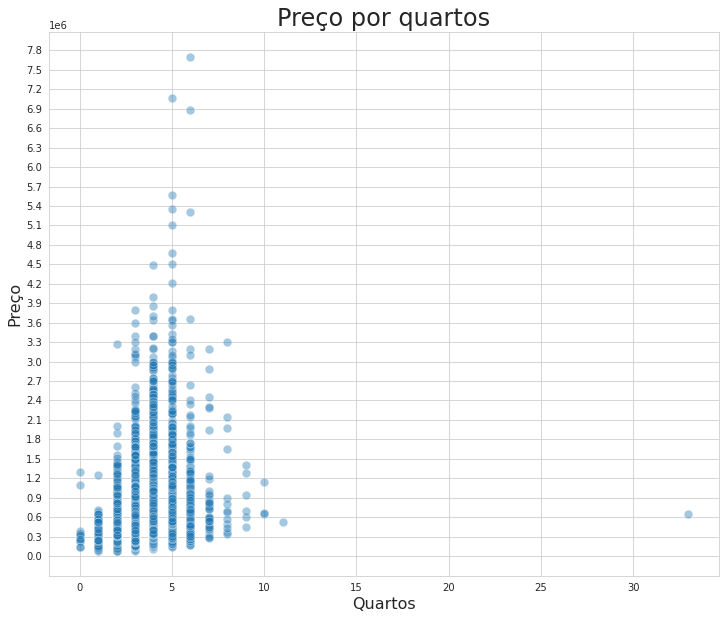

In [157]:
plt.figure(figsize=(12, 10))
plt.title('Preço por quartos', fontsize=24)
plt.xlabel('Quartos', fontsize=16)
plt.ylabel('Preço', fontsize=16)
plt.yticks(np.arange(0, 8000000, step=300000))

sns.scatterplot(x=df['bedrooms'], y=df['price'], s=75, alpha=0.4);


É possível observar a densidade dos pontos entre os valores de 300 mil a 3 milhões, vamos calcular a quantidade de casas que estão entre esses valores.

In [158]:
#Quantas casas estão entre o valor de 300 mil e 3 milhões?
casas_300k_3kk = df[(df.price >= 300000) & (df.price <= 3000000)].shape[0]
porcentagem = (casas_300k_3kk/df.shape[0])*100
print(f'A quantidade de casas com um valor entre 300 mil e 3 milhões é de {casas_300k_3kk}. Cerca de {porcentagem:.2f}% do total de casas.')

A quantidade de casas com um valor entre 300 mil e 3 milhões é de 17131. Cerca de 79.26% do total de casas.


É possível observar também que há um dado ou dados que possui mais de 30 quartos. Antes de analisar os outros atributos, vamos tentar indentificar esse dado que, aparentemente, é um outlier.

In [159]:
df[df['bedrooms'] > 30]

id       date     price  ...     long  sqft_living15  sqft_lot15
15870  2402100895 2014-06-25  640000.0  ... -122.331           1330        4700

[1 rows x 21 columns]

Apenas um caso foi retornado. Devido a quantidade de quartos ser incompatível com o preço e a metragem quadrada vamos removê-lo para que não nos atrapalhe futuramente na análise.

In [160]:
df.drop(axis=0, index=15870, inplace=True)

In [161]:
df[df['bedrooms'] > 30] # Checamos se o dado foi realmente removido.

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

Com o dado removido, vamos plotar novamente o gráfico para que tenhamos uma visualização melhor do que a anterior.

In [162]:
plt.figure(figsize=(12, 10))
plt.title('Preço por quartos', fontsize=24)
plt.xlabel('Quartos', fontsize=16)
plt.ylabel('Preço por milhão', fontsize=16)
plt.xticks(np.arange(0, 15, step=1))
plt.yticks(np.arange(0, 8000000, step=300000))

sns.scatterplot(x=df['bedrooms'], y=df['price'], s=75, alpha=0.4);

Podemos observar no gráfico que há muitas casas que possuem a mesma quantidade de quartos, mas o preço varia entre elas. Isso significa que outros atributos estão influenciando também no valor das casas. Vamos testar isso com um outro atributo chamado **"waterfront"**, que informa se a casa possui vista para o mar.

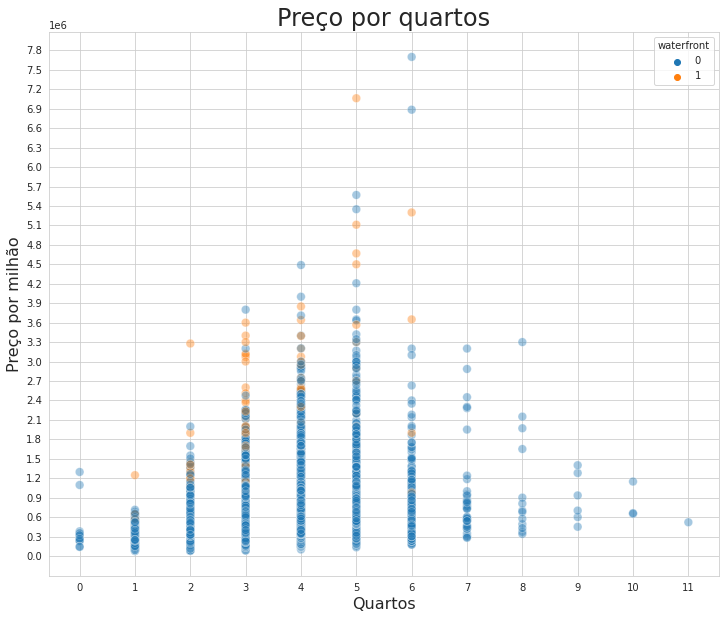

In [163]:
plt.figure(figsize=(12, 10))
plt.title('Preço por quartos', fontsize=24)
plt.xlabel('Quartos', fontsize=16)
plt.ylabel('Preço por milhão', fontsize=16)
plt.xticks(np.arange(0, 15, step=1))
plt.yticks(np.arange(0, 8000000, step=300000))

sns.scatterplot(x=df['bedrooms'], y=df['price'], hue=df['waterfront'], s=75, alpha=0.4);

Observe como o atributo **"waterfront"**(em laranja) aumentou o preço das casas.

Concluímos também que a quantidade de quartos até 5 aumenta o preço das casas, depois disso o preço não aparenta ser influenciado pelos quartos, inclusive, casas com apenas 5 quartos são mais caras do que outras com mais de 7 quartos. Um claro indício que outros atributos influenciam o preço mais do que a quantidade de quartos.

Deduzi também que as casas com mais de 10 quartos são possíveis outliers, devido a sua inconsistência com os outros atributos. Não acho que sejam mansões, pois o preço também é inconsistente.

Vamos agora analisar pela quantidade de **banheiros** (lembrando que 0.5 significa um banheiro sem chuveiro).

In [164]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
plt.title('Preço por banheiros', fontsize=24)
plt.xlabel('Banheiros', fontsize=16)
plt.ylabel('Preço por milhão', fontsize=16)
plt.xticks(np.arange(0, 10, step=0.5))
plt.yticks(np.arange(0, 8000000, step=500000))

sns.scatterplot(x=df['bathrooms'], y=df['price'], alpha=0.4);

Claramente podemos observar que há uma correlação entra a quantidade de banheiros e o preço por apartamento, entretanto, vemos também que há dados que fogem do padrão. Vamos analisá-los.

In [165]:
df[df['bathrooms'] >= 6.5] #A princípio, os dados parecem serem normais. Não sei explicar porque algumas casas possuem tantos banheiros,
                           #mas com preços tão discrepantes. Entretanto, quanto mais formos analisando os atributos mais respostas obteremos.

id       date      price  ...     long  sqft_living15  sqft_lot15
4024   9175600025 2014-10-07   800000.0  ... -122.368           2810       33190
7252   6762700020 2014-10-13  7700000.0  ... -122.323           3940        8800
8092   1924059029 2014-06-17  4668000.0  ... -122.210           3270       10454
8546    424049043 2014-08-11   450000.0  ... -122.301           1448        3866
9254   9208900037 2014-09-19  6885000.0  ... -122.240           4540       42730
12777  1225069038 2014-05-05  2280000.0  ... -121.986           4850      217800
20578   424069279 2015-03-28  1180000.0  ... -122.039           2710       12550
21506  2524069097 2014-05-09  2238890.0  ... -121.982           1800       44890

[8 rows x 21 columns]

Vamos plotar o atributo **metragem do interior que está acima do solo.**

In [166]:
plt.figure(figsize=(12, 6))
plt.title('Preço por metragem do interior acima do solo', fontsize=24)
plt.xlabel('Metragem quadrada', fontsize=16)
plt.ylabel('Preço por milhão', fontsize=16)
plt.xticks(np.arange(0, 15000, step=1000))
plt.yticks(np.arange(0, 8000000, step=500000))

sns.scatterplot(x=df['sqft_above'], y=df['price']);

É possível ver claramente **um aumento linear**. Vamos olhar este mesmo atributo, mas classificando-os por quantidade de andares.

In [167]:
plt.figure(figsize=(12, 6))
plt.title('Preço por metragem do interior acima do solo', fontsize=24)
plt.xlabel('Metragem quadrada', fontsize=16)
plt.ylabel('Preço por milhão', fontsize=16)
plt.xticks(np.arange(0, 15000, step=1000))
plt.yticks(np.arange(0, 8000000, step=500000))

sns.scatterplot(x=df['sqft_above'], y=df['price'], hue=df['floors'], palette=plt.get_cmap('jet'), alpha=0.5)
plt.legend(title='Andares');

Juntamente com o crescimento da metragem quadrada, **o número de andares, na grande maioria, sobe de 1 para 2.**

Em seguida, vamos analisar o atributo **metragem do interior** juntamente com o atributo de **nota da vista da casa**.

In [168]:
plt.figure(figsize=(12, 6))
plt.title('Preço por metragem do interior', fontsize=24)
plt.xlabel('Metragem quadrada', fontsize=16)
plt.ylabel('Preço por milhão', fontsize=16)
plt.xticks(np.arange(0, 15000, step=1000))
plt.yticks(np.arange(0, 8000000, step=500000))

sns.scatterplot(x=df['sqft_living'], y=df['price'], hue=df['view'], palette=plt.get_cmap('jet'), s=50, alpha=0.6)
notas_vista = ['Péssima', 'Muito ruim', 'Ruim', 'Boa', 'Muito boa', 'Excelente']
plt.legend(notas_vista, title='Vista', title_fontsize=14); #Converti a nota da vista de númerica para categórica na legenda.

Vamos ver o mesmo gráfico, mas substituindo o atributo de **vista** para o da **condição** da casa.

In [169]:
plt.figure(figsize=(12, 6))
plt.title('Preço por metragem do interior', fontsize=24)
plt.xlabel('Metragem quadrada', fontsize=16)
plt.ylabel('Preço por milhão', fontsize=16)
plt.xticks(np.arange(0, 15000, step=1000))
plt.yticks(np.arange(0, 8000000, step=500000))

sns.scatterplot(x=df['sqft_living'], y=df['price'], hue=df['condition'], palette=plt.get_cmap('jet'), s=50, alpha=0.6)
notas_vista = ['Péssima', 'Muito ruim', 'Ruim', 'Boa', 'Muito boa', 'Excelente']
plt.legend(notas_vista, title='Condição', title_fontsize=14);

Novamente, vamos substituir o atributo **condição da casa** para a **nota da construção e design**.



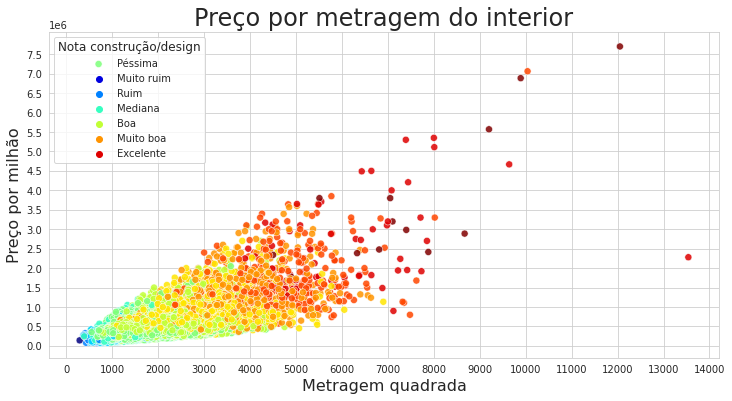

In [170]:
plt.figure(figsize=(12, 6))
plt.title('Preço por metragem do interior', fontsize=24)
plt.xlabel('Metragem quadrada', fontsize=16)
plt.ylabel('Preço por milhão', fontsize=16)
plt.xticks(np.arange(0, 15000, step=1000))
plt.yticks(np.arange(0, 8000000, step=500000))

sns.scatterplot(x=df['sqft_living'], y=df['price'], hue=df['grade'], palette=plt.get_cmap('jet'), s=50, alpha=0.85)
notas_vista = ['Péssima', 'Muito ruim', 'Ruim', 'Mediana', 'Boa', 'Muito boa', 'Excelente']
plt.legend(notas_vista, title='Nota construção/design', title_fontsize=12);

Vemos nesses gráficos uma clara tendência de que as casas mais caras sempre possuem os atributos **vista, condição da casa, nota da construção e design** altos. Para ser justo, a maioria das casas possuem uma boa **condição**, mas ainda sim casas que excedem nesse valor estão com valores altos.

Vamos agora plotar um gráfico de mapa, visto que possuímos dados de latitude e longitude

In [171]:
bounding_box = (df['long'].min(), df['long'].max(), df['lat'].min(), df['lat'].max()) #Adquirindo as latitudes e longitudes máximas e mínimas
bounding_box

(-122.51899999999999, -121.315, 47.1559, 47.7776)

In [172]:
mapa = plt.imread('./map.png')

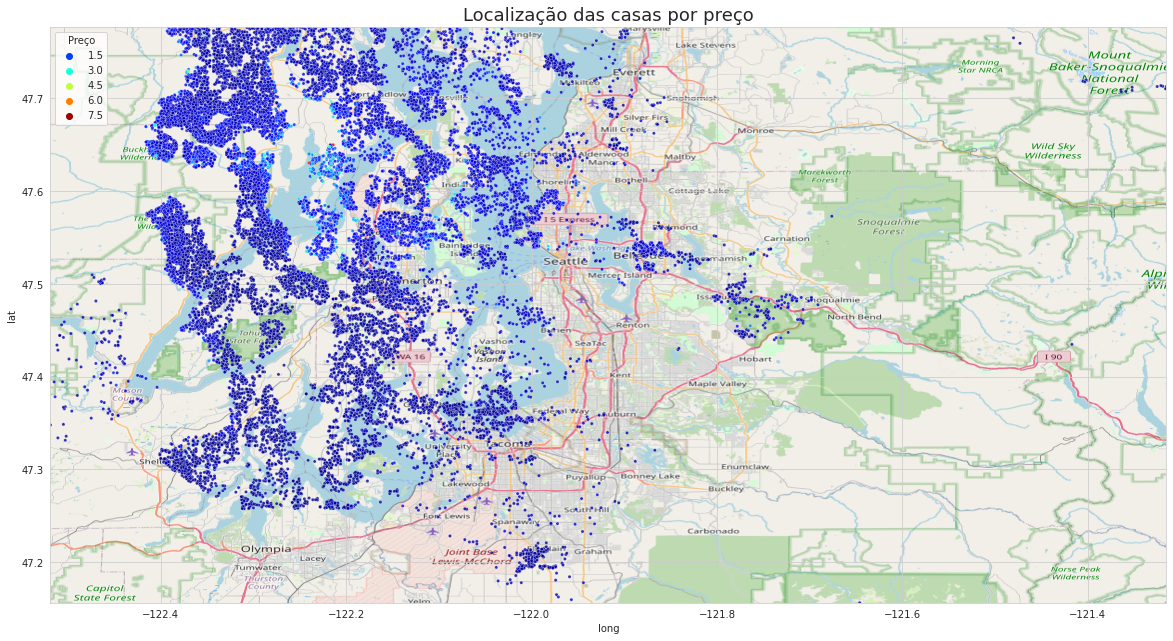

In [173]:

fig, ax = plt.subplots(figsize=(20, 18))

sns.scatterplot(x=df['long'], y=df['lat'], alpha=0.8, hue=df['price'], palette=plt.get_cmap('jet'), s=10, ax=ax)
plt.legend(title='Preço')
ax.set_title('Localização das casas por preço', fontsize=18)
ax.set_xlim(bounding_box[0], bounding_box[1])
ax.set_ylim(bounding_box[2], bounding_box[3])

ax.imshow(mapa, extent=bounding_box, aspect='equal');

O gráfico está muito poluído e o intervalo dos preços muito alto. Vamos dividir os dados entre intervalos de preços para analisarmos se existe um padrão por preço na localização.

In [174]:
min_trezentos = df[(df['price'] >= 75000) & (df['price'] < 300000)] # De 75 mil até, não incluso, 300 mil.
trezentos_quinhentos = df[(df['price'] >= 300000) & (df['price'] < 500000)] # De 300 mil até, não incluso, 500 mil.
quinhentos_1kk = df[(df['price'] >= 500000) & (df['price'] < 1000000)] # De 500 mil até, não incluso, 1 milhão
mais_1kk = df[(df['price'] >= 1000000)] # Mais que 1 milhão.

In [175]:
fig, ax = plt.subplots(figsize=(20, 18))

sns.scatterplot(x=min_trezentos['long'], y=min_trezentos['lat'], alpha=0.8, hue=min_trezentos['price'], palette=plt.get_cmap('jet'), s=10, ax=ax)
plt.legend(title='Preço')
ax.set_title('Localização das casas entre 75 e 300 mil', fontsize=18)
ax.set_xlim(bounding_box[0], bounding_box[1])
ax.set_ylim(bounding_box[2], bounding_box[3])

ax.imshow(mapa, extent=bounding_box, aspect='equal');

In [176]:
fig, ax = plt.subplots(figsize=(20, 18))

sns.scatterplot(x=trezentos_quinhentos['long'], y=trezentos_quinhentos['lat'], alpha=0.8, hue=trezentos_quinhentos['price'], palette=plt.get_cmap('jet'), s=10, ax=ax)
plt.legend(title='Preço')
ax.set_title('Localização das casas entre 300 mil e 500 mil', fontsize=18)
ax.set_xlim(bounding_box[0], bounding_box[1])
ax.set_ylim(bounding_box[2], bounding_box[3])

ax.imshow(mapa, extent=bounding_box, aspect='equal');

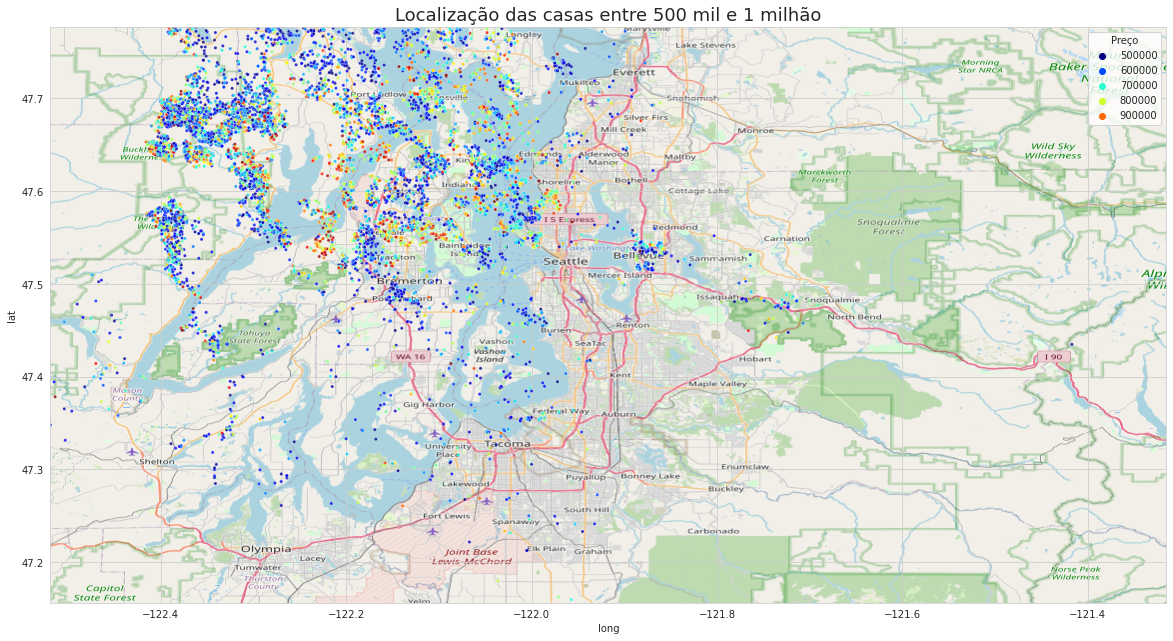

In [177]:
fig, ax = plt.subplots(figsize=(20, 18))

sns.scatterplot(x=quinhentos_1kk['long'], y=quinhentos_1kk['lat'], alpha=0.8, hue=quinhentos_1kk['price'], palette=plt.get_cmap('jet'), s=10, ax=ax)
plt.legend(title='Preço')
ax.set_title('Localização das casas entre 500 mil e 1 milhão', fontsize=18)
ax.set_xlim(bounding_box[0], bounding_box[1])
ax.set_ylim(bounding_box[2], bounding_box[3])

ax.imshow(mapa, extent=bounding_box, aspect='equal');

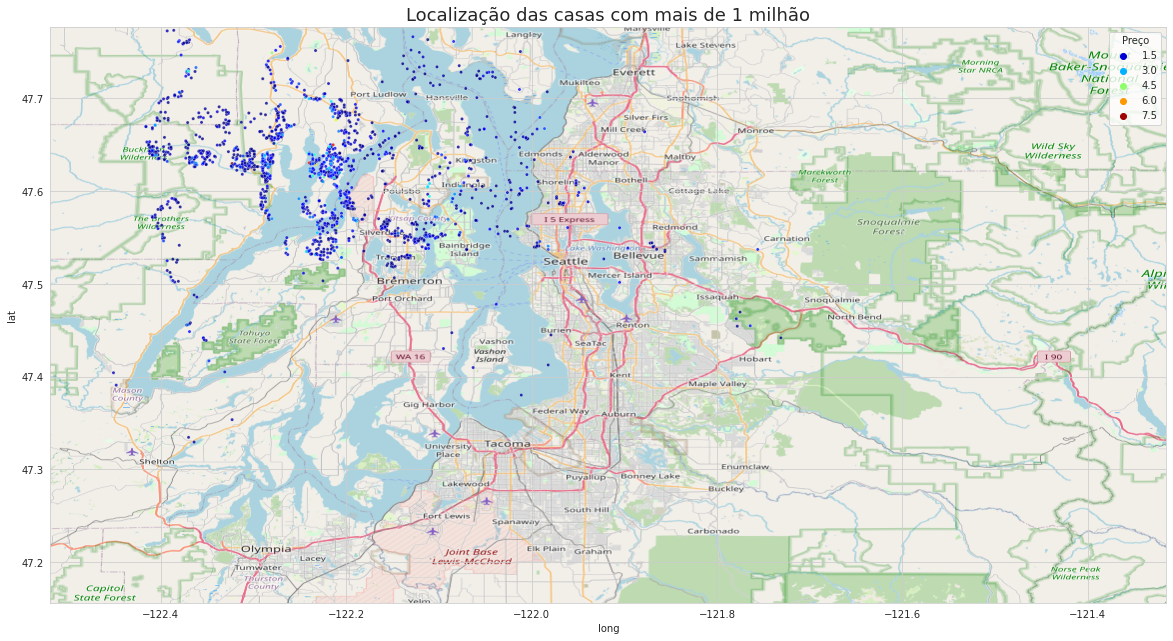

In [178]:
fig, ax = plt.subplots(figsize=(20, 18))

sns.scatterplot(x=mais_1kk['long'], y=mais_1kk['lat'], alpha=0.8, hue=mais_1kk['price'], palette=plt.get_cmap('jet'), s=10, ax=ax)
plt.legend(title='Preço')
ax.set_title('Localização das casas com mais de 1 milhão', fontsize=18)
ax.set_xlim(bounding_box[0], bounding_box[1])
ax.set_ylim(bounding_box[2], bounding_box[3])

ax.imshow(mapa, extent=bounding_box, aspect='equal');

Analisando os gráficos é possível observar uma certa tendência de que quanto **maior o valor mais ao norte a casa se localiza**.

Visto isso, vamos analisar no dataframe uma porção das casas que estão localizadas mais ao norte e ver se elas estão reformadas ou não.

In [179]:
def porcento(casas, total):                  #Função para calcular porcentagem.
  return (casas.shape[0]/total.shape[0])*100

In [180]:
casas_caras_reformadas = df[(df['lat'] > 47.5) & (df['price'] >= 700000) & (df['yr_renovated'] != 0)] #Casas que foram reformadas que custam mais de 700 mil.
total_casas_caras = df[df['price']>=700000]                                                           #e que estão mais ao norte.

In [181]:
print(f'As casas de mais de 700 mil reformadas representam {porcento(casas_caras_reformadas, total_casas_caras):.2f}% do total de casas com o mesmo valor.')
print(f'Total de casas caras reformadas: {casas_caras_reformadas.shape[0]} casas.')
print(f'Total de casas caras: {total_casas_caras.shape[0]} casas.')


As casas de mais de 700 mil reformadas representam 8.45% do total de casas com o mesmo valor.
Total de casas caras reformadas: 373 casas.
Total de casas caras: 4412 casas.


Vamos ver agora quantas casas baratas, mas que se encontram na mesma região das casas caras, foram reformadas.

In [182]:
total_casas_baratas = df[(df['lat'] > 47.5) & (df['price'] <= 500000)] #Utilizamos a latitude para selecionar a região com casas mais caras.
casas_baratas_reformadas = df[(df['lat'] > 47.5) & (df['price'] <= 500000) & (df['yr_renovated'] != 0)]

In [183]:
print(f'As casas de menos de 500 mil reformadas representam {porcento(casas_baratas_reformadas, total_casas_baratas):.2f}% do total de casas com o mesmo valor')
print(f'Total de casas baratas reformadas: {casas_baratas_reformadas.shape[0]} casas.')
print(f'Total de casas baratas: {total_casas_baratas.shape[0]} casas.')


As casas de menos de 500 mil reformadas representam 3.01% do total de casas com o mesmo valor
Total de casas baratas reformadas: 199 casas.
Total de casas baratas: 6608 casas.


In [184]:
casas_baratas_reformadas.index


Int64Index([  209,   237,   274,   379,   398,   717,   773,   842,   927,
             1209,
            ...
            19021, 19025, 19188, 19321, 19342, 19405, 19417, 19618, 20057,
            20447],
           dtype='int64', length=199)

Com estes dados em "mãos", vemos que pouquíssimas casas reformadas representam o total. Possivelmente, isso acontece porque as casas que não foram reformadas são novas, dispensando reformas. Vamos conferir isso analisando o conjunto de casas reformadas e o ano em que elas foram construídas.

É necessário remover as casas reformadas do total para que elas não atrapalhem no cálculo da média.

In [185]:
index_baratas = casas_baratas_reformadas.index
novo_total_baratas = total_casas_baratas.drop(index=index_baratas)
novo_total_baratas.shape

(6409, 21)

In [186]:
index_caras = casas_caras_reformadas.index
novo_total_caras = total_casas_caras.drop(index=index_caras)
novo_total_caras.shape

(4039, 21)

In [187]:
def media_casas(casas): #Função para calcular a média do ano em que as casas foram construídas
  return int(casas['yr_built'].median())

In [188]:
print(f'As casas baratas e reformadas foram construídas em média no ano de {media_casas(casas_baratas_reformadas)}.')
print(f'As casas caras e reformadas foram construídas em média no ano de {media_casas(casas_caras_reformadas)}.')
print(f'As casas baratas que não foram reformadas foram construídas em média no ano de {media_casas(novo_total_baratas)}.')
print(f'As casas caras que não foram reformadas foram construídas em média no ano de {media_casas(novo_total_caras)}.')


As casas baratas e reformadas foram construídas em média no ano de 1937.
As casas caras e reformadas foram construídas em média no ano de 1941.
As casas baratas que não foram reformadas foram construídas em média no ano de 1963.
As casas caras que não foram reformadas foram construídas em média no ano de 1987.


Concluímos, portanto, **que as casas reformadas são bem mais antigas do que as que não foram**. Vemos, também, **que as casas baratas, em suas respectivas categorias de reformadas ou não, são mais antigas que as caras.**

Para analisar qual a melhor época para vender vamos fazer um histograma.

In [189]:
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
plt.figure(figsize=(12,6))
sns.countplot(x=df['date'].dt.month)
plt.title('Quantidade de casas vendidas por mês', fontsize=18)
plt.xticks(np.arange(0, 13), meses, rotation=45)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Vendas', fontsize=14);

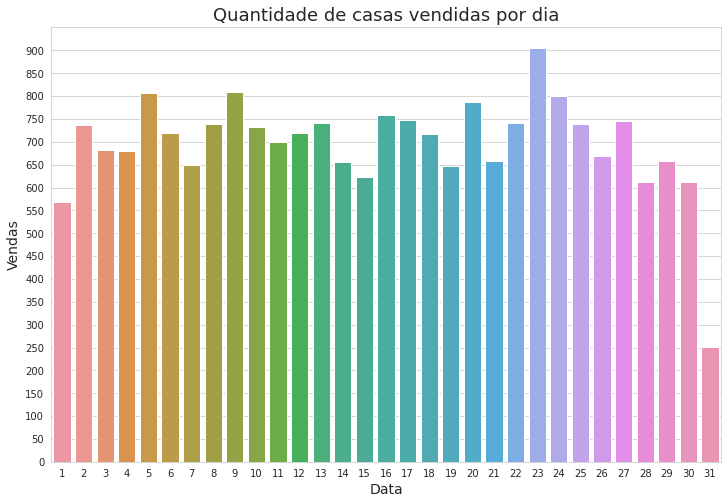

In [190]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['date'].dt.day)
plt.title('Quantidade de casas vendidas por dia', fontsize=18)
plt.xticks(np.arange(0, 31))
plt.yticks(np.arange(0, 950, step=50))
plt.xlabel('Data', fontsize=14)
plt.ylabel('Vendas', fontsize=14);

Observamos, então, que **a melhor época para vender as casas seriam entre os meses de março a outubro**. As vendas não variam muito com os dias, com exceção do último dia do mês que tiveram vendas abaixo do normal, mas isso se deve ao fato de que há meses em que não há 31 dias, consequentemente afetando a quantidade de números de vendas relativo aos outros dias.

##Conclusão

Após esta análise, possuímos respostas satisfatórias para aumentar o lucro da empresa e responder as perguntas que me foram feitas no início.

**1. Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?**


> As casas que o CEO deveria comprar são as casas entre 160 mil a 600 mil não reformadas que se encontram na mesma região que as casas de mais de 700 mil (região norte do mapa), pois elas se encontram em uma boa localização, onde já há casas que ultrapassam o valor de 1 milhão.

**2. Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?**


> O melhor momento para vendê-las, certamente, seria entre os meses de março a outubro. O melhor preço para vendê-las seria no valor de mais de 700 mil sendo, o preço de venda, proporcional ao preço em que foram inicialmente compradas e das reformas que se fariam.

**3. A House Rocket deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?**


> As casas não reformadas poderiam passar por uma reforma, aumentando o preço delas para que fiquem na mesma média de preços das casas que já são caras. Por exemplo, a empresa poderia comprar uma casa com um preço de 300 mil e fazer as reformas necessárias que possam aumentar o valor da casa para entre 700 mil e 1 milhão, quanto maior o valor da compra inicial maior a possibilidade do valor da venda ultrapassar o milhão. 

> As reformas que indico, baseado na análise dos gráficos, seriam para implementar os atributos que fazem as outras casas serem caras. Atributos esses são: **maior metragem do interior de habitação, vista para o mar, boa a excelente vista que a casa possui, média de 5 quartos, de 3 a 5 banheiros, em boa a excelente condição, boa a excelente construção e design. Além disso, recomendo que a casa tenha dois andares e concomitantemente uma considerável metragem do interior de habitação para o andar de cima.**

> Exemplos de como esses atributos podem aumentar o valor de venda: **casas com a mesma quantidade de quartos, mas algumas com vista para o mar sempre possuem uma diferença positiva no valor com algumas chegando a 600 mil a mais; os preços das casas crescem linearmente com a metragem do interior; da mesma forma que a metragem do interior, o preço das casas crescem linearmente com a nota da construção e design; casas com a mesma metragem interior podem saltar de 500 mil para mais de 1 milhão se possuírem uma excelente vista ou uma condição muito boa ou excelente.**




